# COSTANTE DI JOULE parte C

### raccolta dati

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from interpolazione2 import RettaInterpolata

# T = np.array([21.5,22,22.5,23,23.5,24,24.5,25,26,27,28,29.5,30.5,32,34,35.5]) + 273.15 # °K
T = np.array([21.5,22,22.5,23,23.5,24,24.5,25,26,27,28,29.5,30.5,32,34,35.5,37,39,40.5,43,45]) + 273.15 # °K

t = np.arange(0,len(T)*60,60) # s
I = 3.5 # A
V = 15 # V
c_h20 = 4187 
m_h20 = 0.3 # kg
me = 0.014 #kg

## misura della costante di joule (J) $T \propto t$

$ T = \frac{I V}{c_{h_2O} J (m + m_e)} t  
\Rightarrow B = \frac{I V}{c_{h_2O} J (m + m_e)}  \Rightarrow J = \frac{I V}{c_{h_2O} B (m + m_e)} $



### misura ideale

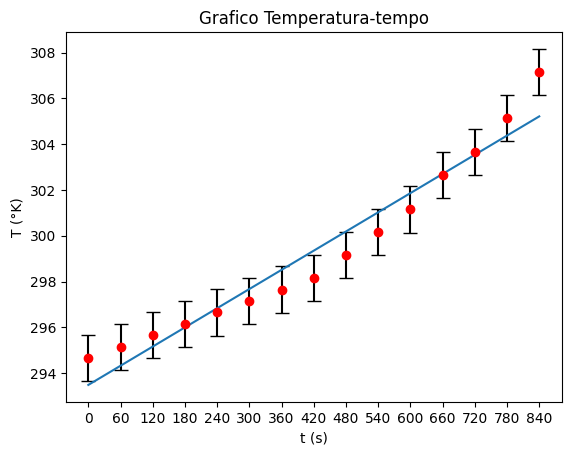


linearità: A+BX
B: 0.013958333333333333
sigmaB: 0.001004495516857215
A: 293.4875
sigmaA: 0.49577730775912776
sigmaY: 1.008505494944541

chiquadro osservato: 11.312986480950432
chiquadro ridotto: 0.8702297293038794
gradi di libertà: 13
vincoli: 2
        
Costante di joule:  2.86 ± 0.21


In [7]:
misure_buone = 15 # prendendo solo 10 misurazioni si ottiene 4.16
r = RettaInterpolata(t[:misure_buone],T[:misure_buone],0.5)
plt.errorbar(r.X,r.Y,fmt='o',yerr=r.sigmaY,ecolor='black',capsize=5,color='red')
plt.plot(r.best_x,r.best_y)
plt.xticks(t[:misure_buone])
plt.title("Grafico Temperatura-tempo")
plt.ylabel("T (°K)")
plt.xlabel("t (s)")
plt.show()
print(r)

J = (I*V)/(c_h20 * r.B * (m_h20 + me))
sigmaJ = J * r.sigmaB / r.B
print('Costante di joule: ',np.round(J,2),'±',np.round(sigmaJ,2))

### misura effettiva

18 B:  [0.008 0.008 0.008 0.008 0.008 0.008 0.009 0.01  0.01  0.011 0.012 0.013
 0.014 0.015 0.016 0.017 0.017 0.018]
18 sigmaB:  [0.006 0.004 0.003 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001]
18 A:  [295. 295. 295. 295. 295. 295. 295. 294. 294. 294. 294. 294. 293. 293.
 293. 293. 292. 292.]
18 sigmaA:  [0.46 0.42 0.39 0.36 0.34 0.32 0.32 0.32 0.34 0.38 0.4  0.43 0.5  0.54
 0.58 0.62 0.65 0.71]
18 sigmaY:  [0.5  0.5  0.5  0.5  0.5  0.5  0.52 0.55 0.6  0.69 0.76 0.85 1.01 1.14
 1.24 1.38 1.48 1.64]
18 costante di joule:  [4.79 4.79 4.79 4.79 4.79 4.79 4.49 4.16 3.88 3.54 3.32 3.1  2.86 2.68
 2.53 2.39 2.29 2.17]
18 sigma costante di joule:  [3.39 2.14 1.52 1.15 0.91 0.74 0.56 0.44 0.36 0.3  0.26 0.22 0.21 0.18
 0.16 0.15 0.14 0.13]


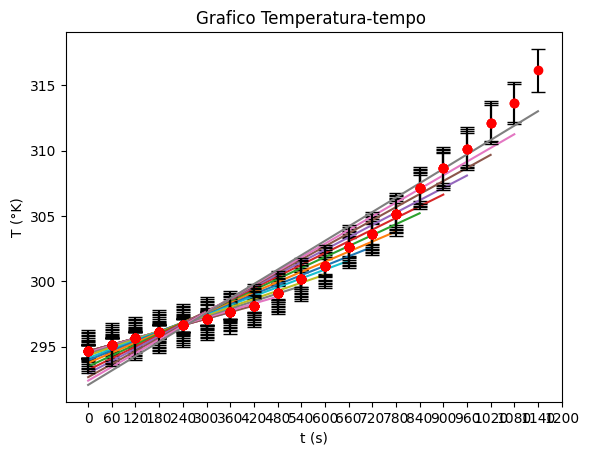

In [8]:
calori_specifici = [] # buffer
sigma_calori_specifici = [] # buffer

B = np.array([])
sigmaB = np.array([])
A = np.array([])
sigmaA = np.array([])
sigmaY = np.array([])

for i in range(3,len(T)):
    r = RettaInterpolata(t[:i], T[:i],0.5) # calcola retta considerando solo i primi punti
    J = (I*V)/(c_h20 * r.B * (m_h20 + me)) # calcola il valore del costante di joule 
    sigmaJ = J * r.sigmaB / r.B # calcola l'errore del costante di joule

    A = np.append(A,r.A)
    sigmaA = np.append(sigmaA,r.sigmaA)
    B = np.append(B,r.B)
    sigmaB = np.append(sigmaB,r.sigmaB)
    sigmaY = np.append(sigmaY,r.sigmaY)

    calori_specifici.append(J)
    sigma_calori_specifici.append(sigmaJ)

    plt.errorbar(r.X,r.Y,fmt='o',yerr=r.sigmaY,ecolor='black',capsize=5,color='red')
    plt.plot(r.best_x,r.best_y)
    plt.title("Grafico Temperatura-tempo ")
    plt.ylabel("T (°K)")
    plt.xlabel("t (s)")
    plt.xticks(t)
# plt.show()

cj = np.array(calori_specifici)
scj = np.array(sigma_calori_specifici)
print( len(B),"B: ", np.round(B,3))
print(len(sigmaB), "sigmaB: ", np.round(sigmaB,3))
print(len(A), "A: ",np.round(A))
print(len(sigmaA),"sigmaA: ", np.round(sigmaA,2))
print(len(sigmaY),"sigmaY: ", np.round(sigmaY,2))
print(len(cj),"costante di joule: ", np.round(cj,2))
print(len(scj),"sigma costante di joule: ", np.round(scj,2)) # ho meno errori quando ho più punti

### considerazioni su $\sigma$:

- $\sigma_y$ aumenta con l'aumentare dei punti che vengono presi in considerazione
- $\sigma_B$ invece diminuisce perchè prendendo in considerazione più punti aumenta la precisione
- L'incertezza dei costante di joule diminuisce al crescere delle misure

In [9]:
# media pesata per i costante di joule
w = (1/(scj**2))

costante_di_joule = np.average(cj,weights=w) # media pesata dei valori ottenuti
errore_medio_costanteJ = 1/np.sqrt(np.sum(w)) # errore della media pesata
print("Costante di joule: ", np.round(costante_di_joule,2), '±',np.round(errore_medio_costanteJ,2))


Costante di joule:  2.66 ± 0.06
